In [18]:
#импорт библиотек
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

In [2]:
#открываю файл
data = pd.read_csv('/datasets/games.csv')

### Step 2. Prepare the data


1. Replace the column names (lower case);👍
2. Convert the data to the desired types. Describe in which columns the data type was replaced and why;👍
3. Process the allowances if necessary:
Explain why you filled in the gaps in a certain way or why you did not do it;👍
4. Describe the reasons that could lead to omissions;👍
5. Pay attention to the abbreviation 'tbd' in the column with the user rating. Separately analyze this value and describe how to process it;👍
6. Calculate the total sales in all regions and record them in a separate column.👍

In [3]:
#приведение столбцов к нижнему регистру
display(data.head())
data.columns = data.columns.str.lower()
display(data.info())
data['year_of_release'].isna().sum()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

269

In [4]:
#данные в нужные типы
#год – всегда целое число
data['year_of_release'] = data['year_of_release'].fillna(0)
data['year_of_release'] = data['year_of_release'].astype(int)
data['user_score'] = data['user_score'].fillna(0)
data[data['user_score'] == 'tbd'] = 0 
#так как to be determined не отличается от отсутствия рейтинга – заменю на 0
data['user_score'] = data['user_score'].astype(float)
data.info()
#имена собственные – object, числовые рейтинги – float, год – integer.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     9479 non-null   float64
 9   user_score       16715 non-null  float64
 10  rating           9999 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
display(data.isna().sum())
data[data['name'].isna()]
#пустые имена и жанры (совпадают) не относятся к 2017 году, а GEN - название сеги в америке. не вижу смысла с ними что-либо делать.

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       7236
user_score            0
rating             6716
dtype: int64

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,0.0,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,0.0,NaN


In [6]:
crscore = data[data['critic_score'].isna()]
display(crscore[crscore['year_of_release'] > 2015].count())
display(data[data['year_of_release'] > 2015].count())
data['rating'] = data['rating'].fillna('No rating')
#половина данных по рейтингу критиков отсутствует. Не вижу смысла заменять её. Игры индивидуальны в оценках. 
#игры без рейтинга заменим на N/A

name               241
platform           241
year_of_release    241
genre              241
na_sales           241
eu_sales           241
jp_sales           241
other_sales        241
critic_score         0
user_score         241
rating              38
dtype: int64

name               468
platform           468
year_of_release    468
genre              468
na_sales           468
eu_sales           468
jp_sales           468
other_sales        468
critic_score       227
user_score         468
rating             250
dtype: int64

In [7]:
data['world_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,0.0,No rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,0.0,No rating,31.38


### Step 3. Conduct a research analysis of the data. 

Look at how many games were released in different years. Is the data for all periods important?

Игр с известным годом выпуска: 14068
Игр всего: 16713
Доля пропущенных значений: 0.1582600370968707


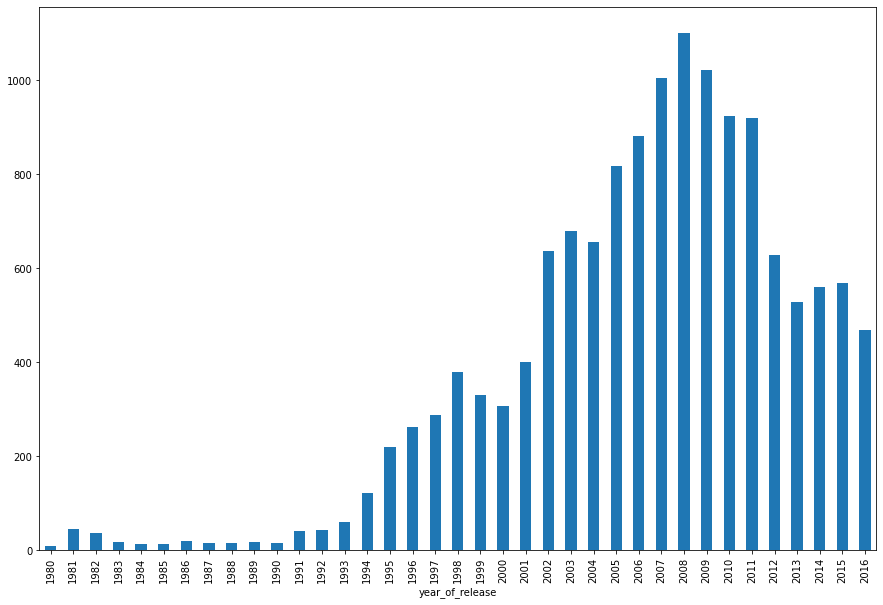

In [8]:
in_years = data[data['year_of_release'] > 0].groupby('year_of_release')['name'].count()
print('Игр с известным годом выпуска:', in_years.sum())
print('Игр всего:', data['name'].count())
print('Доля пропущенных значений:', (data['name'].count() -  in_years.sum())/data['name'].count())
ax = in_years.plot(kind='bar', figsize=(15,10))

<b> Conclusion: </b> The release dynamics is important to estimate the number of games that will be released in future years. The number of games released grew by 2009 and then began to fall. This may affect the final output.

Look at how sales have changed across platforms. Select the platforms with the highest total sales and build a distribution by year. For what characteristic period of time do new platforms appear and old ones disappear?

,world_sales
platform,
PCFX,0.03
GG,0.04
3DO,0.10
TG16,0.16
WS,1.42
NG,1.44
SCD,1.86
DC,15.95
GEN,30.77


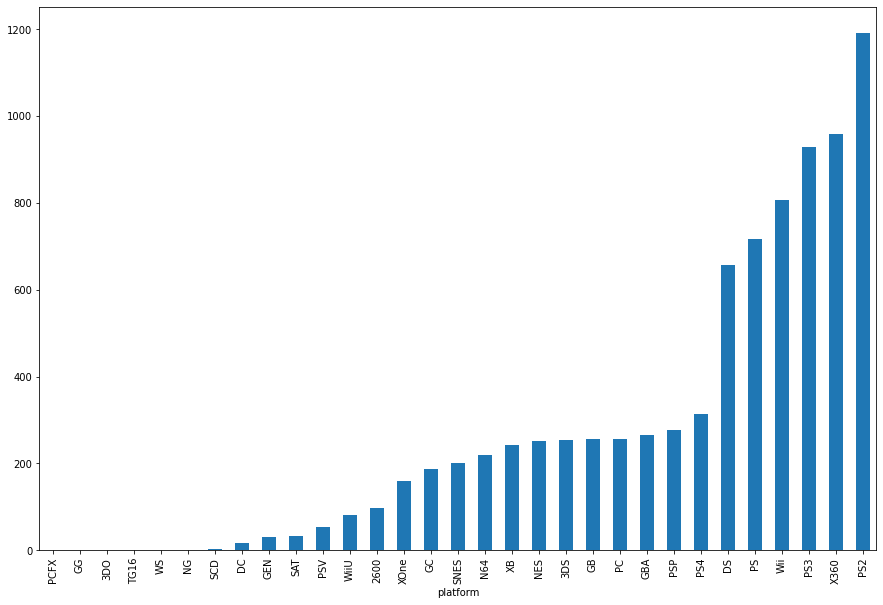

In [9]:
sales_by_platforms = data[data['platform'] != 0].pivot_table(index=['platform'], values='world_sales', aggfunc='sum').sort_values(by='world_sales')
#sales_by_platforms = data[data['platform'] != 0].groupby('platform').count()
display(sales_by_platforms)
ax = sales_by_platforms['world_sales'].sort_values().plot(kind='bar', figsize=(15,10))
#больше всего игр было продано для PlayStation 2. Посмотрим срез для первых 5 платформ.

<AxesSubplot:xlabel='year_of_release'>

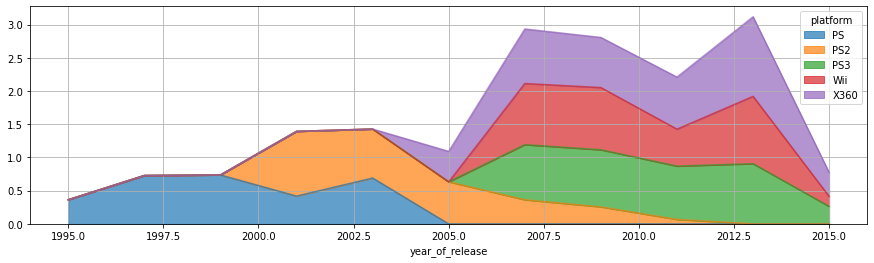

In [10]:
most_sales = data[((data['platform'] == 'PS') | (data['platform'] == 'Wii') | (data['platform'] == 'PS3') | (data['platform'] == 'X360') | (data['platform'] == 'PS2')) & data['year_of_release'] != 0]
most_sales_pivot = most_sales.pivot_table(index='year_of_release', columns='platform', values='world_sales').plot(kind='area', grid=True, figsize=(15,4), alpha=0.7);
display(most_sales_pivot)

The original PS "lived" until 2000, when PS2 began to replace it. In 2007, when the PS2 began to decline, it had 3 competitors at once – a newer generation of PS3, Wii and Xbox 360. PS "lived" for about 6 years, like the PS2 – without competitors. The PS2 "lived" the longest, which just collected more sales. Most likely, this is due to the lack of strong competitors in relation to product quality. The high level of sales for competing platforms lasts on average 4 years – let's take this period as the actual one. The analysis will be carried out from 2013 to 2016 inclusive. This is also indicated by the decline in 2013 and the peak in the middle of this four-year period, after which a new decline is visible by 2016.

Take the data for the relevant current period. Determine the current period yourself as a result of the study of previous questions. The main factor is that these data will help to build a forecast for 2017.
**Which platforms are leading in sales, are they growing or falling? Select several potentially profitable platforms.**

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.32,0.97,12.38,113.24,25.99,3.14,10.59,8.11,21.65,88.57,18.96
2014,43.07,NaN,13.25,47.40,100.00,0.24,11.90,2.61,22.01,33.77,54.07
2015,27.21,NaN,8.49,16.30,118.86,0.12,5.95,0.15,16.27,11.87,59.92
2016,15.10,NaN,5.22,3.16,69.15,NaN,4.24,NaN,4.30,1.22,25.82


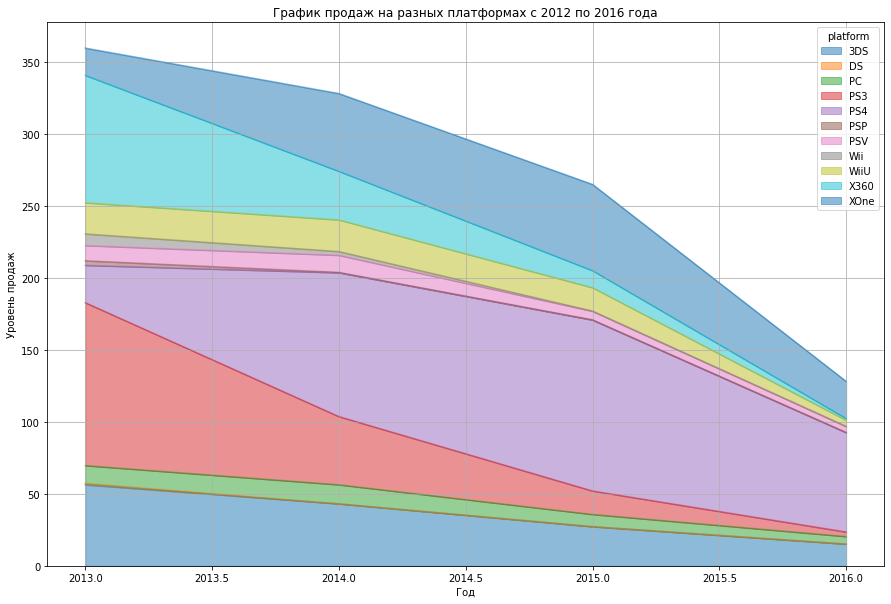

In [11]:
relevant_data = data[data['year_of_release'] > 2012]
relevant_pivot = relevant_data.pivot_table(index='year_of_release', columns='platform', values='world_sales', aggfunc='sum')
display(relevant_pivot)
ax = relevant_pivot.plot(kind='area', grid=True, figsize=(15,10), alpha=0.5, title='График продаж на разных платформах с 2012 по 2016 года', xlabel='Год', ylabel='Уровень продаж')

The PS4, Xbox One and Nintendo 3DS look the most relevant. It is also important to emphasize the stability of the sales level on the PC – despite a small percentage of the total market, you can not be afraid to "miss" with expectations.

**Build a "box with a mustache" chart for global game sales by platform. Describe the result.**

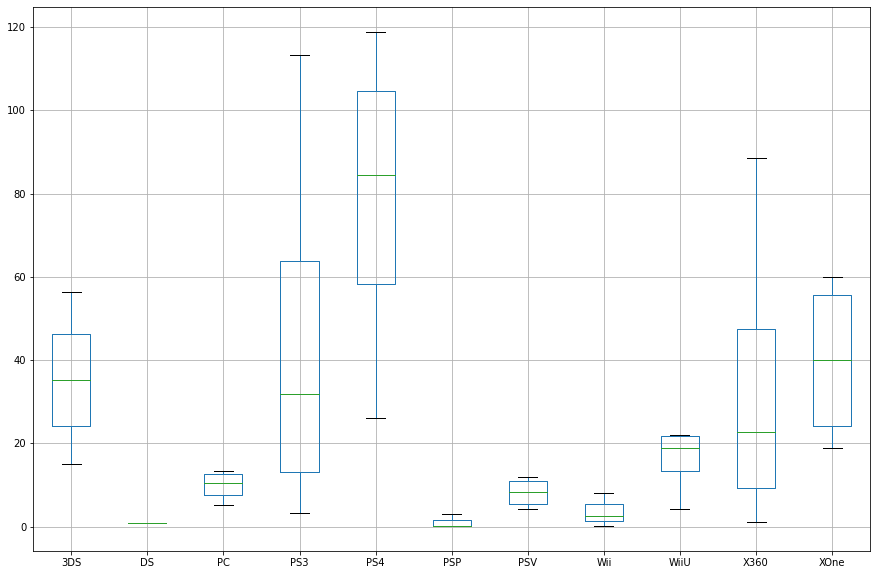

In [12]:
ax = relevant_pivot.boxplot(figsize=(15,10), grid=True)

The largest median of sales is on the PS4 platform. Next come the Xbox One and Nintendo 3DS. Despite the large spread in purchases on the PS3, the median differs by more than 2 times from the PS4. The data is comparable with the previous analysis – 3 main platforms are identified.

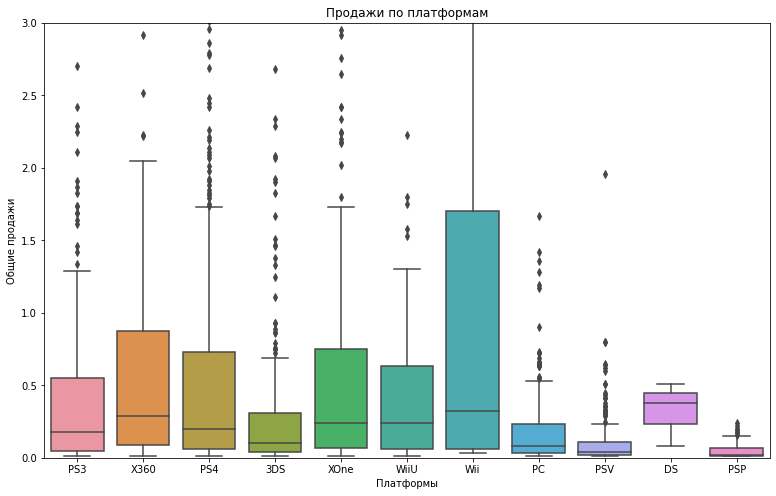

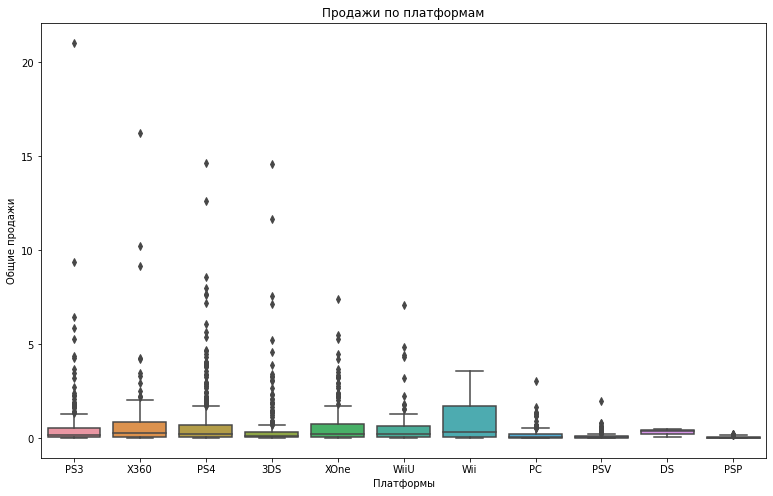

In [30]:
# Чтобы лучше были видны квантили, медианы

plt.figure(figsize=(13, 8))
(sb.boxplot(data = relevant_data, y = 'world_sales', x='platform')
    .set(title = 'Продажи по платформам', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 3)))


# Чтобы были лучше видны "хвосты"

plt.figure(figsize=(13, 8))
(sb.boxplot(data = relevant_data, y = 'world_sales', x='platform')
    .set(title = 'Продажи по платформам', xlabel = 'Платформы', ylabel = 'Общие продажи'))

plt.show()

Наблюдается интересная зависимость: чем моложе платформа, тем больше дорогих игр (верхний "ус"), и тем больше медиана тяготеет к верхней границе – то есть со временем более дорогие игры стали продавться лучше, чем дешевые. С увеличением популярности платформы увеличивается и размах – можно продать больше дорогих игр.

<div class="alert alert-info"> Действительно, средние объемы продаж по платформам небольшие, и среднее вылезает наверх за счет большого количества выбросов – очень популярных игр, поднимающих средние продажи. Oсобенно это видно по платформе PS4. Спасибо за подсказку)</div>

**Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.**

In [ ]:
#возьмем самую популярную платформу – PS4
ps4 = relevant_data[(relevant_data['platform']=='PS4') & (relevant_data['user_score'] > 0)]
ax = sb.scatterplot(x=ps4['critic_score'], y=ps4['world_sales'], alpha=0.5)
print(ps4['critic_score'].corr(ps4['world_sales']))

In [ ]:
ax = sb.scatterplot(x=ps4['user_score'], y=ps4['world_sales'], alpha=0.5)
print(ps4['user_score'].corr(ps4['world_sales']))

There is a weak positive correlation between critics' ratings and sales. There is no correlation with user ratings.

**Correlate the findings with the sales of games on other platforms.**

In [ ]:
plats_pivot = relevant_data.pivot_table(index='platform', values=['user_score', 'critic_score'], aggfunc='median')
display(plats_pivot)
def corrfunc(platform):
    x = relevant_data[(relevant_data['platform']==platform) & (relevant_data['user_score'] > 0)]
    plt.scatter(x=x['critic_score'], y=x['world_sales'], alpha=0.5)
    ax.set_xlabel=f'Оценка критиков по платформе {platform}' 
    ax.set_ylabel=f'Мировые продажи по платформе {platform}'
    plt.show()
    print(x['critic_score'].corr(x['world_sales']))
    plt.scatter(x=x['user_score'], y=x['world_sales'], alpha=0.5)
    plt.show()
    print(x['user_score'].corr(x['world_sales']))

platforms = ['3DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'WiiU', 'X360', 'XOne']

for plats in platforms:
    corrfunc(plats)

On all platforms where there is enough data for analysis, it is confirmed that the correlation with critics' ratings is weak and positive, and there is no correlation at all with users' ratings.

**Look at the overall distribution of games by genre. What can be said about the most profitable genres? Do genres with high and low sales stand out?**

In [ ]:
genre_pivot_sales = relevant_data.pivot_table(index='genre', values='world_sales', aggfunc='sum').sort_values('world_sales', ascending=False)
genre_pivot_sales = genre_pivot_sales.reset_index()
genre_pivot = relevant_data.pivot_table(index='genre', values='world_sales', aggfunc='median').sort_values('world_sales', ascending=False)
genre_pivot = genre_pivot.reset_index()
display(genre_pivot_sales)
display(genre_pivot)

Most of the sales are made by games in the genre of action and shooter, least of all – strategy and puzzle games. It is important to emphasize that most of the earnings, however, bring shooters and games about sports, and least of all – adventure.

### Step 4. Make a portrait of the user of each region. 

Determine for the user of each region (NA, EU, JP):

The most popular platforms (top 5). Describe the differences in sales shares.

In [ ]:
na_data = relevant_data[relevant_data['platform'] != 0].pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
na_data = na_data.reset_index()
f, ax = plt.subplots(figsize=(15,10))
plt.bar(na_data['platform'], na_data['na_sales'], color='#0C90C4', label='Продажи в Северной Америке')
plt.bar(na_data['platform'], na_data['eu_sales'], color='#075878', label='Продажи в Европе')
plt.bar(na_data['platform'], na_data['jp_sales'], color='#5ACCF9', label='Продажи в Японии')
plt.legend()
na_data.sort_values('na_sales', ascending=False)

Nintendo platforms were initially focused on the domestic market, so their sales shares in Japan are standard high. PS is also a Japanese company, but it is focused on the whole world. Although the share of sales in Japan is high, they are not leading. Xbox, created by Microsoft, entered the Japanese market with difficulty and does not occupy a large share there.
The most popular platform in North America and Europe is PlayStation 4, in Japan – 3DS.

**The most popular genres (top 5). Explain the difference.**

In [ ]:
genre_pivot_count = relevant_data.pivot_table(index='genre', values='name', aggfunc='count').sort_values('name', ascending=False)
genre_pivot_count = genre_pivot_count.reset_index()
f, ax = plt.subplots(figsize=(15,10))
plt.bar(genre_pivot['genre'], genre_pivot['world_sales'])
plt.title('Доля заработка с одной игры')
plt.show()
f, ax = plt.subplots(figsize=(15,10))
plt.bar(genre_pivot_sales['genre'], genre_pivot_sales['world_sales'])
plt.title('Общемировые продажи')
plt.show()
f, ax = plt.subplots(figsize=(15,10))
plt.bar(genre_pivot_count['genre'], genre_pivot_count['name'])
plt.title('Количество игр указанного жанра')
plt.show()

The most popular games in the action genre are the most produced, besides they bring the largest amount of total profit. Then, with a margin of more than 2 times, there are role-playing games and adventures, sports and shooters. With one game, the manufacturer will earn the most money if it is in the shooter genre. Sports games are in second place. The popularity of the genre does not mean profitability for the company, since action takes only 6th place in the list.

**Does the ESRB rating affect sales in a particular region?**

In [ ]:
ESRB_pivot = relevant_data.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='median')
ESRB_pivot = ESRB_pivot.reset_index()
ESRB_pivot.plot(kind='bar', x='rating')
ESRB_pivot

### Step 5. Check the hypotheses
**Average user ratings of Xbox One and PC platforms are the same**

In [ ]:
relevant_data = relevant_data[relevant_data['user_score'] != 0]
alpha = .05
results = st.ttest_ind((relevant_data[relevant_data['platform'] == 'XOne']['user_score']), (relevant_data[relevant_data['platform'] == 'PC']['user_score']))
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Indeed, the average user ratings do not depend on the platform in this case. The null hypothesis in this case is that the ratings are not different.

**Average user ratings of genres Action (English "action", action games) and Sports (English "sports competitions") are different.**

In [ ]:
alpha = .05
results = st.ttest_ind((relevant_data[relevant_data['genre'] == 'Action']['user_score']), (relevant_data[relevant_data['genre'] == 'Sports']['user_score']))
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

The average user rating of Action genre games differs from that in the Sports genre, the null hypothesis is rejected.

For both tests, a test was applied for two independent samples, since platforms do not depend on each other, as well as genres, and since these data are not general aggregates, but representative samples. The null hypothesis in both cases suggests that the average user ratings do not differ.

<h2> General output </h2>

From 2008 to 2016, the number of games released fell, with a slight rise in 2014. Based on this dynamics, as well as on the "lifetimes" of various platforms, it can be understood that new platforms may be released by 2017, and it would be much more profitable to catch this moment and buy games for them. At the moment, the relevance of all platforms is falling. The best platforms still alive today are PS4, Xbox One and Nintendo 3DS. 

User reviews do not correlate with game sales. Critics' reviews have a weak positive correlation, but this does not mean causation – perhaps good games are just bought more often). Most of the sales are made by games in the genre of action and shooter, least of all – strategy and puzzle games. It is important to emphasize that most of the earnings, however, bring shooters and games about sports, and least of all – adventure. We should have shooter, action and sports genres in our shop. Also, perhaps, role-playing and platformers, fighting games. 

An analysis of a separate European region leads to the same conclusions – the most relevant platform for us at the moment is PS4. there should definitely be games for it in our store. Fifa, for example. Also Xbox One. 

Also in the European region, games for adults and children over 10 years old are best sold. 
At the same time, judging by the analysis, the average user rating will not affect the sale of games in any way – you can ignore it. 

It is important that expensive games are selling better now – it is important to have them in your store.